# Table of Contents
1. Dataset description
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions


# 1. Dataset description
**Data set contains:**

Total Rows = 10866
Total Columns = 21
Some columns in the data set contain null values

In [1]:
#The import statements for all of the packages that are used in this dataset

import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies_df = pd.read_csv('C:/Users/MERIUM/Downloads/DATA SCIENCE ASSIGNMENT/DATA SCIENCE ASSIGNMENT/tmdb-movies.csv',encoding="unicode_escape")
#read the csv file using pandas read_csv function

In [3]:
movies_df.shape
#this shows the number of rows and columns

(10866, 21)

In [4]:
movies_df.columns
#this shows the columns' names

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
## to read the brief summary of the project, use info() function, for example, column no. 4 (revenue),
##has 10866 non-null rows and column no.6(cast) has 10790 non-null rows

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:

# In the dataset, some columns contain null values

# 2. Data Wrangling
Here, we keep and analyse relevant data and delete the unused data

In [9]:
#From the head and tail functions, observe that for some columnns like 'budget',revenue', 'budget_adj', 'revenue_adj, the currency has not been indicated.The dataset also contain lots of movies where the budget or revenue have a value of '0'
##The describe functionbriefly describes the dataset

In [10]:
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
movies_df.tail()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [12]:
movies_df.describe()
#this briefly describes the data set

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
#As mentioned above, the dataset contains null values 
#The function below counts total rows in each column which contain null values
movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Data Cleaning (Removing The Unused Information From The Dataset)
**Information That We Need To Delete Or Modify**
1. We need to remove duplicate rows from the dataset
2. Changing format of release date into datetime format
3. Remove the unused colums that are not needed in the analysis process.
4. Remove the movies which are having zero value of budget and revenue.

**1. Remove duplicate rows**

In [14]:
# in pandas, the duplicated() function returns the duplicate row as True and othter as False
movies_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [15]:
#for counting the duplicate elements we sum all the rows
sum(movies_df.duplicated())

1

In [16]:
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
movies_df.drop_duplicates(inplace = True)
#afetr removing duplicate value from the dataset
print("After Removing Duplicate Values (Rows,Columns) : ",movies_df.shape)

After Removing Duplicate Values (Rows,Columns) :  (10865, 21)


In [17]:
#as shown above, the no of rows decreases by 1, meaning one duplicated row has been removed.

**2. Changing Format Of Release Date Into Datetime Format**

In [18]:
#the format given in the dataset is in string format. e.g. 6/9/15
#So we need to change this in datetime format i.e. 2015-06-09

In [19]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**3. Remove the unused colums that are not needed in the analysis process**
1. We can see that 21 columns in the dataset, We can drop the the colums which are not usable in the data analysis process. columns like: imdb_id,overview etc.
2. The columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis and I will drop these columns.

In [20]:
movies_df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",movies_df.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10865, 15)


**4. Drop theses rows which contain incorrect or inappropriate values.**
-In this dataset, there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies have not been recorded. Calculating the profits of these movies would lead to inappropriate results. I think this may be due to varying factors like the lack of information, or the movies that were never released. I have chosen to eradicate these values during the data cleaning phase.

In [21]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",movies_df[(movies_df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",movies_df[(movies_df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


**Since now we have the columns, rows and format of the dataset in right way, its time to investigate the data for the questions asked.**

# 3. Exploratory Data Analysis
I am going to look into one variable at a time, and then follow it up by looking at relationships between variables.

**Research Question 1 : Which year has the highest release of movies?**

In [22]:
#group for each year and count of the number of movies in each year
data=movies_df.groupby('release_year').count()['id']
print(data.tail())

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


In [23]:
data=movies_df.groupby('release_year').count()['id']
print(data.head())

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64


<AxesSubplot:xlabel='release_year'>

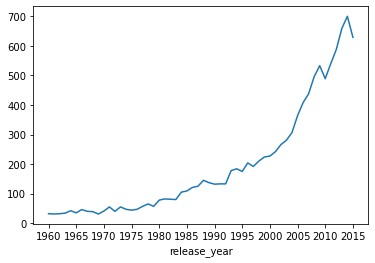

In [24]:
#group of the data according to their release year and count the total number of movies in each year and pot.
movies_df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

**From the plot above,we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).**

**Research Question 2 : Which Movie Has The Highest Or Lowest Profit?**

In [25]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
movies_df['Profit'] = movies_df['revenue'] - movies_df['budget']

In [26]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = movies_df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = movies_df[x].idxmax()
    high = pd.DataFrame(movies_df.loc[high_index,:])
    low = pd.DataFrame(movies_df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",movies_df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",movies_df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


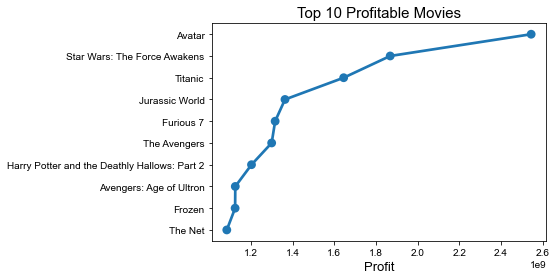

In [27]:
#to make a plot which contain top 10 movies which earn highest profit;
#to sort the 'Profit' column in decending order and store it in the new dataframe;
info = pd.DataFrame(movies_df['Profit'].sort_values(ascending = False))
info['original_title'] = movies_df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#to make a plot using pointplot for top 10 profitable movies;
ax = sns.pointplot(x=y,y=x)

#to setup the figure size;
sns.set(rc={'figure.figsize':(10,5)})
#to setup the title and labels of the plot;
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

**Research Question 3 : Movie with Highest And Lowest Budget?**

In [29]:
#find the movie with highest and lowest budget.
#use 'find_minmax' function which  was earlier mentioned
#the movie with budget zeroshouldn't affect the result.
#so, change the zero into NAN in budget column.
movies_df['budget'] = movies_df['budget'].replace(0,np.NAN)
find_minmax('budget')


Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,425000000.0,1.0
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


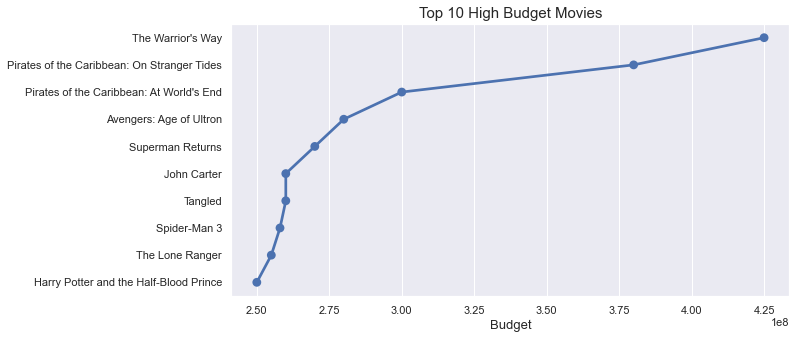

In [30]:
#to make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(movies_df['budget'].sort_values(ascending = False))
info['original_title'] = movies_df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#to plot the figure and setup the title and labels;
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

**Research Question 4 : Movie with Largest And Lowest Earned Revenue?**

In [31]:
#to find the movie with highest and lowest earned revenue,
#use 'find_minmax' function which we used earlier
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000.0,30000000.0
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


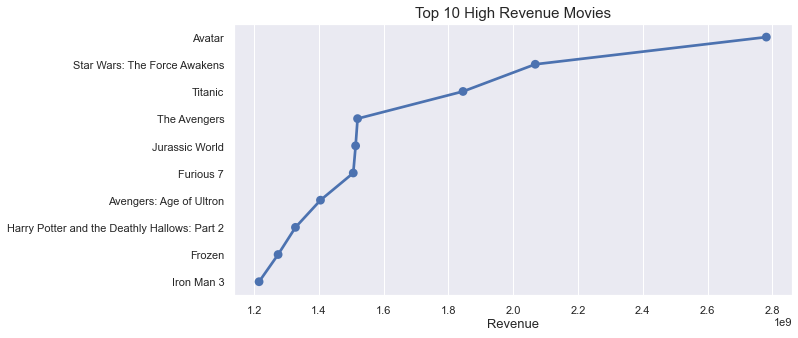

In [32]:
#top 10 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(movies_df['revenue'].sort_values(ascending = False))
info['original_title'] = movies_df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

**Research Question 5 : Movie with Longest And Shortest Rintime?**

In [34]:
#find the movie with longest and shortest runtime.
#use 'find_minmax' function by passsing 'runtime' as argument.
#it can't be possible a movie with zero runtime,but dataset contain some data like this.
#so update zero with NAN in runtime column.
movies_df['runtime'] = movies_df['runtime'].replace(0,np.NAN)
find_minmax('runtime')

Movie Which Has Highest runtime :  The Story of Film: An Odyssey
Movie Which Has Lowest runtime  :  Fresh Guacamole


,3894,4883
id,125336,142563
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900.0,2.0
genres,Documentary,Animation


So again the first column shows the runtime of the highest and second the lowest with column names as the index number.

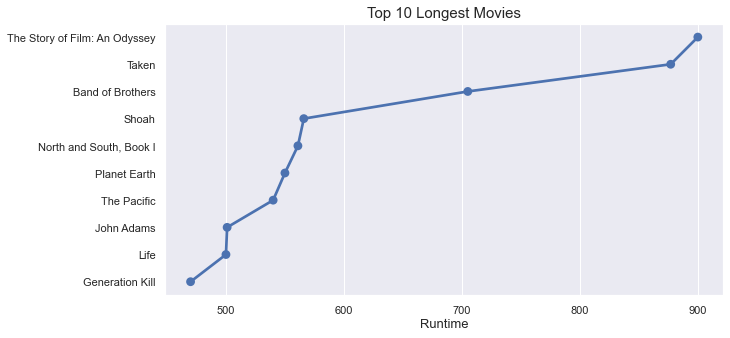

In [36]:
#top 10 Movies With Longest runtime
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(movies_df['runtime'].sort_values(ascending = False))
info['original_title'] = movies_df['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

**Research Question 6 : Movie with Highest And Lowest Votes?**

In [37]:
#find the movie with most and least votes.
#use 'find_minmax' function by passsing 'Vote_average' as argument.
find_minmax('vote_average')

Movie Which Has Highest vote_average :  The Story of Film: An Odyssey
Movie Which Has Lowest vote_average  :  Transmorphers


,3894,7772
id,125336,25055
popularity,0.006925,0.12112
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900.0,86.0
genres,Documentary,Action|Adventure|Science Fiction


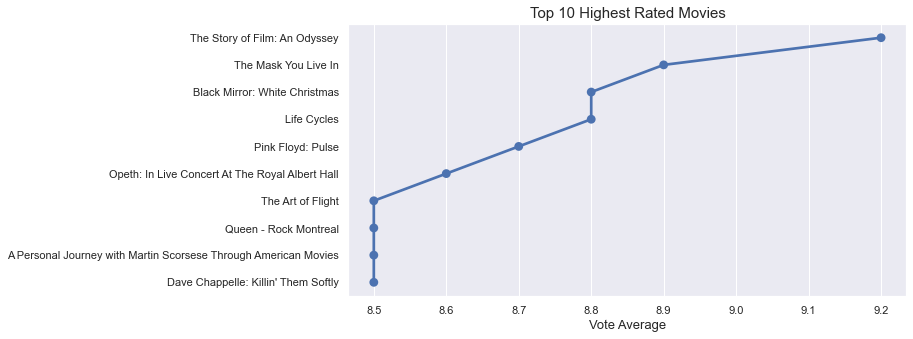

In [38]:
#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(movies_df['vote_average'].sort_values(ascending = False))
info['original_title'] = movies_df['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

**Research Question 7 : Which Year Has The Highest Profit Rate?**

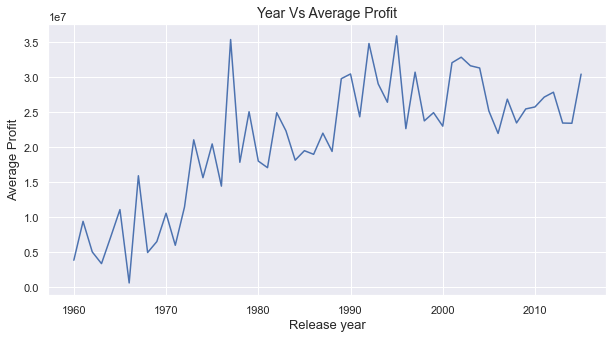

In [39]:
#do year-wise analysis of profit earn by movies in each earn.
#take the average of profit made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean profit and plot.
movies_df.groupby('release_year')['Profit'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

**According to the plot year 1975-1976 had the most profitable years and the profit was very low between the years 1960 and 1970.**

**Research Question 8 : Which length movies most liked by the audiences according to their popularity?**

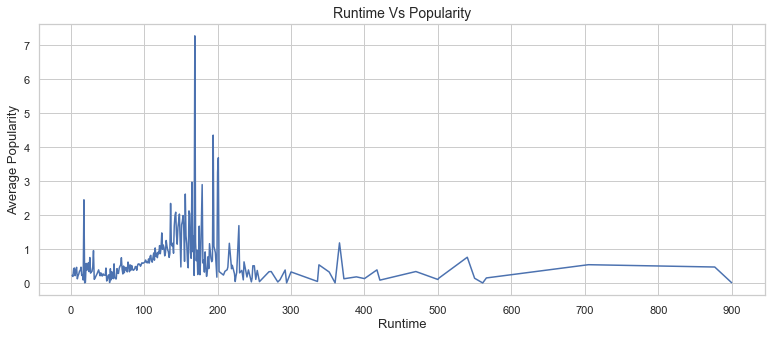

In [40]:
#use groupby function and group the data according to their runtime.
#make a plot using their popularity and find which length movies are most popular.

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
movies_df.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

**According to the plot we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.**

**Research Question 9: Average Runtime Of Movies From Year To Year?**

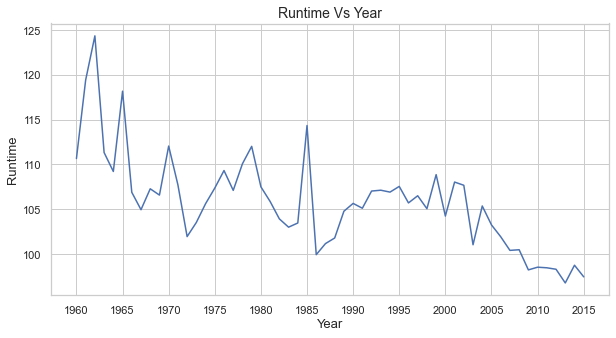

In [41]:
#how the runtime of the movies differ year to year.

#make the group of the data according to their release_year and find the mean  related to this and plot.
movies_df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")


**According to the plot movie duration is decreasing year to year and it's TRUE. Because at this time nobody want to watch the long duration movies because it is quite boring. That's why the average runtime duraion of the movies are arround 100 Minutes.**

**Research Question 10: How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?**

Correlation Between Revenue And Budget :  0.6885561524636727


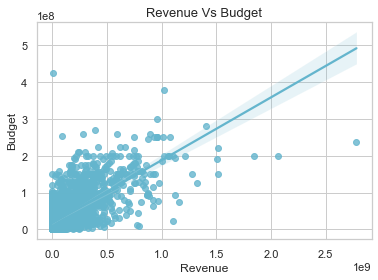

In [44]:
#how does revenue change according to their budget.
#to make a scatter plot using 'regplot' between ''revenue' and 'budget'.
ax = sns.regplot(x=movies_df['revenue'], y=movies_df['budget'],color='c')

#set the title and labels of the figure
ax.set_title("Revenue Vs Budget",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them
#change zero into NAN in budget and revenue column for the exact calculation.
movies_df['budget']= movies_df ['budget'].replace(0,np.NAN)
movies_df['revenue'] = movies_df['revenue'].replace(0,np.NAN)
movies_df['Profit'] = movies_df['Profit'].replace(0,np.NAN)

#find the correlation using 'corr()' function.
#it returns a dataframe which contain the correlation between all the numeric columns.
data_corr = movies_df.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

Correlation Between Profit And Budget :  0.5383810819019572


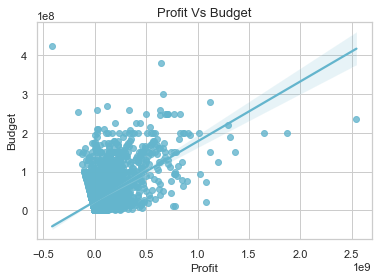

In [46]:
#how does profit change according to their budget.
#make a scatter plot using 'regplot' between 'profit' and 'budget'.
ax = sns.regplot(x=movies_df['Profit'], y=movies_df['budget'],color='c')

#setup the title and the labels of the plot.
ax.set_title("Profit Vs Budget",fontsize=13)
ax.set_xlabel("Profit",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)

#setup the figure size and style sheet of the plot.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#print the correction between them,which was stored in 'data_corr' dataframe earlier.
print("Correlation Between Profit And Budget : ",data_corr.loc['Profit','budget'])

Correlation Between Release Year And Vote Average :  -0.11757558609467468


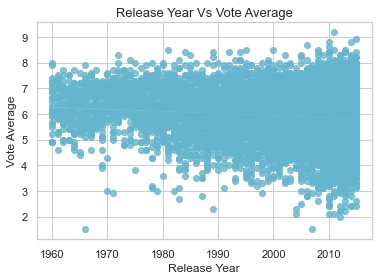

In [48]:
#how does vote average(ratings) change according to the release year.
#make a scatter plot using 'regplot' between 'year' and 'vote average'.
ax = sns.regplot(x=movies_df['release_year'], y=movies_df['vote_average'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Release Year Vs Vote Average",fontsize=13)
ax.set_xlabel("Release Year",fontsize=12)
ax.set_ylabel("Vote Average",fontsize=12)

#set the figure size and print the correlation between them.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
print("Correlation Between Release Year And Vote Average : ",data_corr.loc['release_year','vote_average'])

Correlation Between Popularity And Profit :  0.6159162443059019


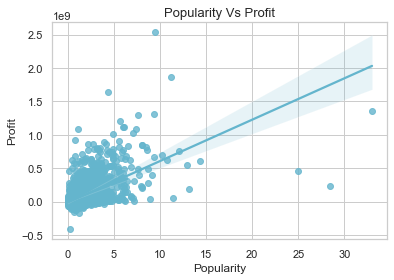

In [49]:
#how does vote average(ratings) change according to the release year.
#make a scatter plot using 'regplot' between 'year' and 'vote average'.
ax = sns.regplot(x=movies_df['popularity'],y=movies_df['Profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#find the correlation between them.
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','Profit'])

**These Are Estimated Values They Can Be Differ.**

1. Budget vs Revenue : Budget and revenue both have positive correlation(0.68) between them. Means there is a good possibility that movies with higher investments result in better revenues.
2. Profit Vs Budget : Profit And Budget both have positive correlation(0.53) between them. Means there is a good possibility that movies with higher investments result in better Profit.
3. Release Year Vs Vote Average : Release year and vote Average have negative correlation(-0.11). Means that movie ratings(vote average) does not depends on the release year.
4. Popularity Vs Profit : Popularity and profit have positive correlation(0.61). It means that movie with high popularity tends to earn high profit.

**Research Question 11: Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?**

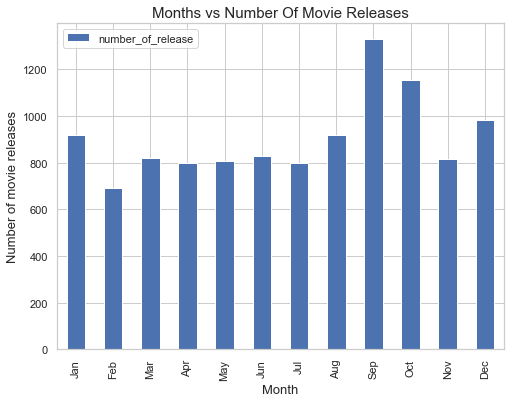

In [50]:
#extract the month number from the release date.
month_release = movies_df['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

**According to the plot we can conclude that there are higher number of release in september and october month.**

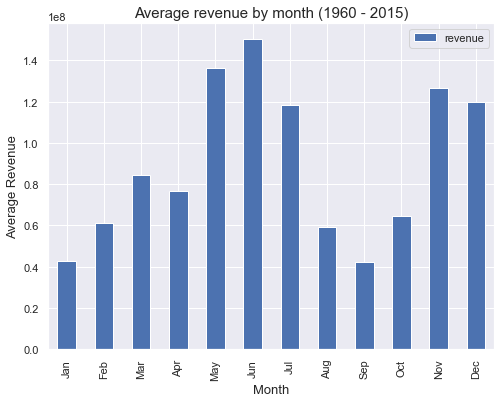

In [51]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = movies_df['revenue']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")


**According tp the plot we can say that movie which release in may or june month made the high revenue in comparison of other month release. Or it can be happened because of outliers.**

**Research Question 12: Which Genre Has The Highest Release Of Movies?**

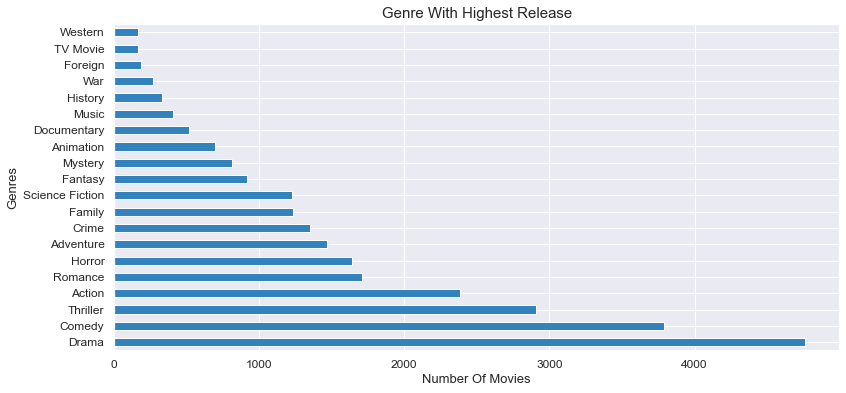

In [52]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = movies_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

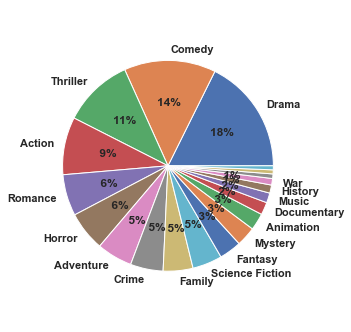

In [53]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()


**Research Question 13: Which genres are most popular from year to year?**

In [55]:
#map all the rows of genres in a list.
genre_details = list(map(str,(movies_df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(movies_df['release_year'])
popularity = np.array(movies_df['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [56]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.753047,1.338265,1.996432,1.398764,0.550490,1.124313,0.951448,1.817532,1.534066,1.097634,...,0.608896,0.520337,0.755137,0.977663,1.034638,0.586530,0.732253,0.755530,1.174435,1.614759
Science Fiction,-0.467064,-0.361952,-0.640003,-0.646572,-0.667888,-0.869288,0.097082,-0.634089,1.452081,-0.710447,...,-0.285369,-0.305635,0.082456,0.679288,-0.104266,0.212188,0.189865,0.575138,0.902119,1.231957
Fantasy,-0.528631,-0.744050,-0.691929,-0.895883,-0.012691,-0.992961,-0.585750,-0.706100,-0.055098,-0.771756,...,0.064256,0.322410,0.008741,0.178378,0.153510,0.028812,0.081027,-0.182739,-0.108344,-0.320493
Crime,-0.607773,-0.111525,-0.192078,-0.020849,0.082887,-0.523188,-0.034184,0.517043,0.209143,0.593035,...,0.085715,0.302191,0.298300,-0.395319,-0.171136,-0.059809,0.092316,0.347388,-0.219402,0.027262
Western,0.705451,-0.588007,-0.266409,-0.863575,-1.009777,-0.527569,-0.028313,-0.775331,-0.824684,0.996730,...,-1.032584,-1.024569,-1.058297,-1.111565,-0.974311,-0.992158,-0.868553,-0.974491,-0.925887,-0.759302


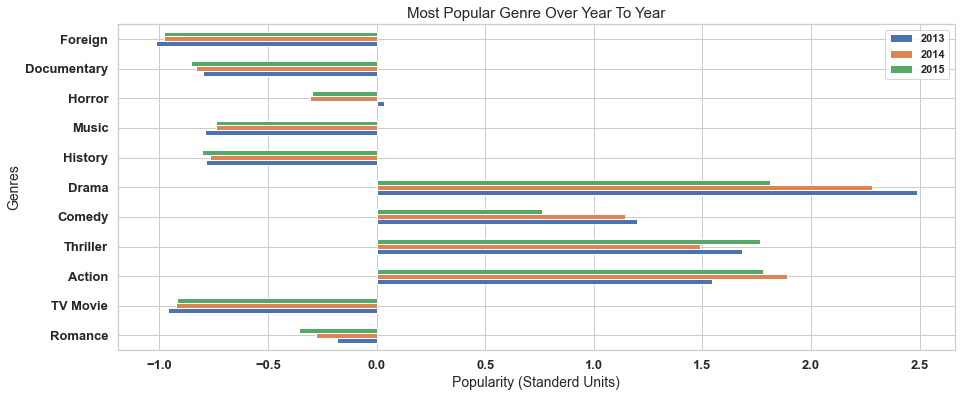

In [57]:
#plot the barh plot of the standardised data.
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standerd Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

<AxesSubplot:>

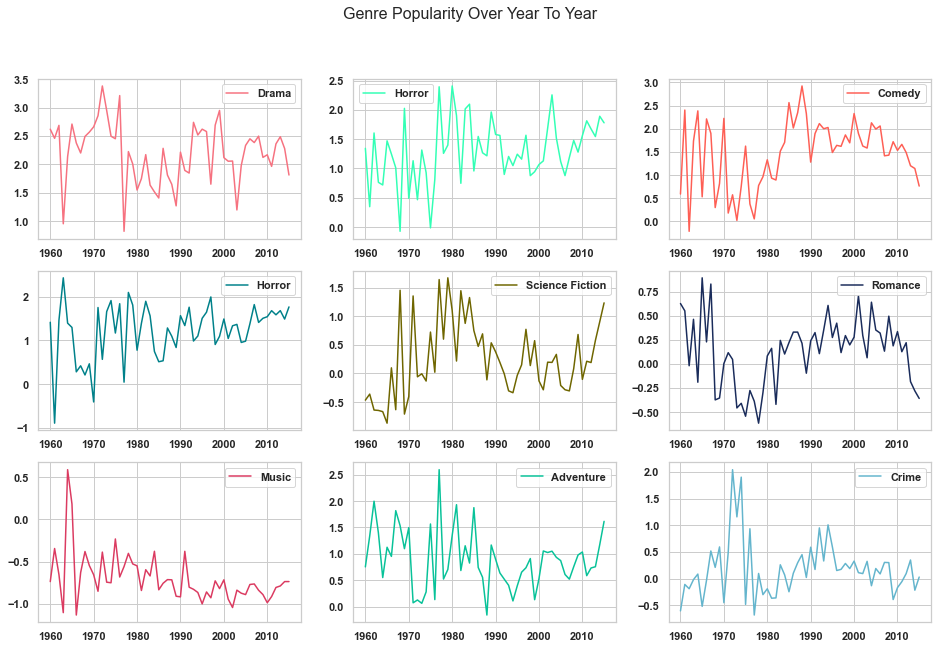

In [58]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 16)

#plot the 'Drama' genre plot see the popularity difference over year to year.
popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)

#plot the 'Action' genre plot see the popularity difference over year to year.
popular_genre.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)

#plot the 'Comedy' genre plot see the popularity difference over year to year.
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)

#accordig to the previous plot the 'Thriller','Science Fiction', 'Romance', 'Music','Adventure' and 'Crime'.
popular_genre.loc['Thriller'].plot(label = "Horror",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

**Reasearch Question 14: Most Frequent Actor?**

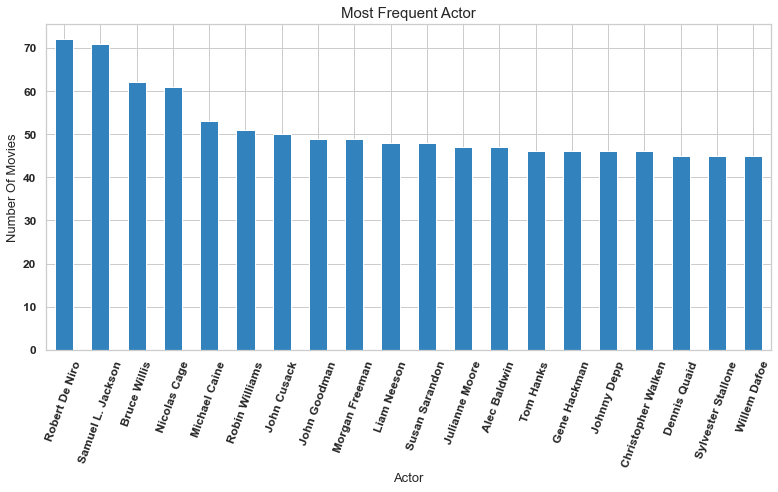

In [59]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_flims = count_genre('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

**Reasearch Question 15: Top 20 Production Companies With Higher Number Of Release?**

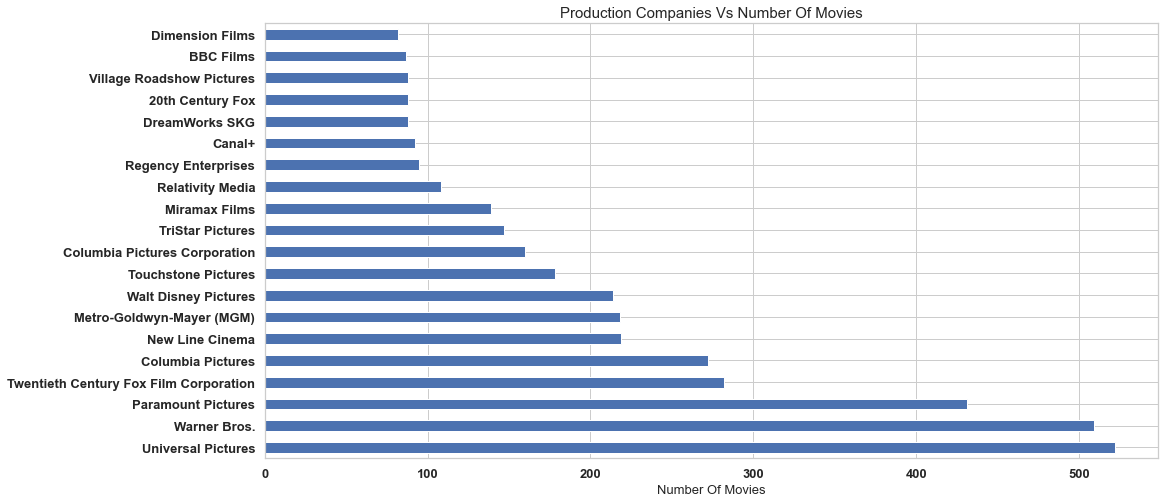

In [60]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies released by each production company.
production_companies = count_genre('production_companies')

#plot he barh plot.
production_companies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
sns.set_style("whitegrid")

**Reasearch Question 16: Life Time Profit Earn By Each Production Company**

In [62]:
##map all the rows of production_companies in a list.
data1 = list(map(str,(movies_df['production_companies'])))
production_companies = pd.DataFrame(production_companies)

#make the list of profit and production_companies which contain all the rows of profit and production_companies column. 
data3 = list(production_companies.index.values)
#append the nan in the data3 because production_companies row has null values also.
data3.append('nan')
movies_df['Profit'] = movies_df['Profit'].replace(np.NAN,0)
profit = np.array(movies_df['Profit'])

#make a null dataframe which indexs are genres and has only one column Total Profit.
companies_df = pd.DataFrame(index = data3 ,columns =np.arange(0,1,1) )
#change all the values of the dataframe from NAN to zero.
companies_df = companies_df.fillna(value = 0.0)

z = 0
for i in data1:
    split_companies = list(map(str,i.split('|')))
    companies_df.loc[split_companies] = companies_df.loc[split_companies] + profit[z]
    z+=1

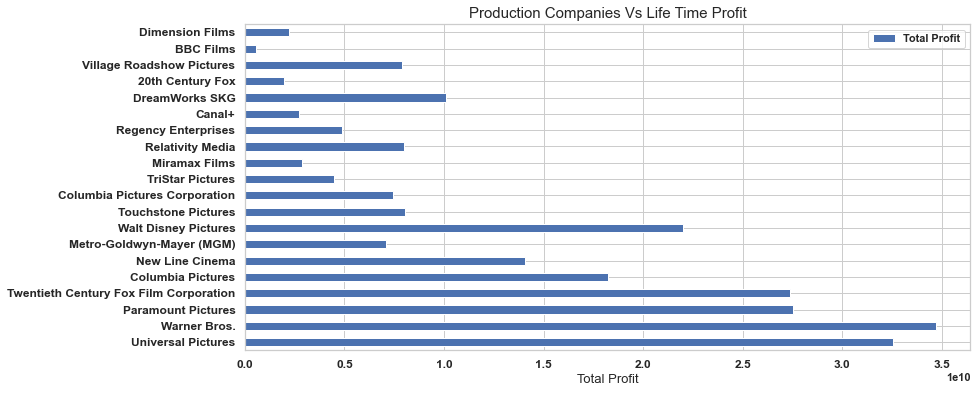

In [63]:
#Rename the column name 
companies_df = companies_df.rename(columns={0:'Total Profit'})
#plot the barh plot
companies_df[:20].plot.barh(figsize=(13,6),fontsize=12,legend=True)
plt.title("Production Companies Vs Life Time Profit",fontsize=15)
plt.xlabel('Total Profit',fontsize=13)
sns.set_style("whitegrid")

**Research Question 17 : Top 20 Director Who Directs Maximum Movies?**

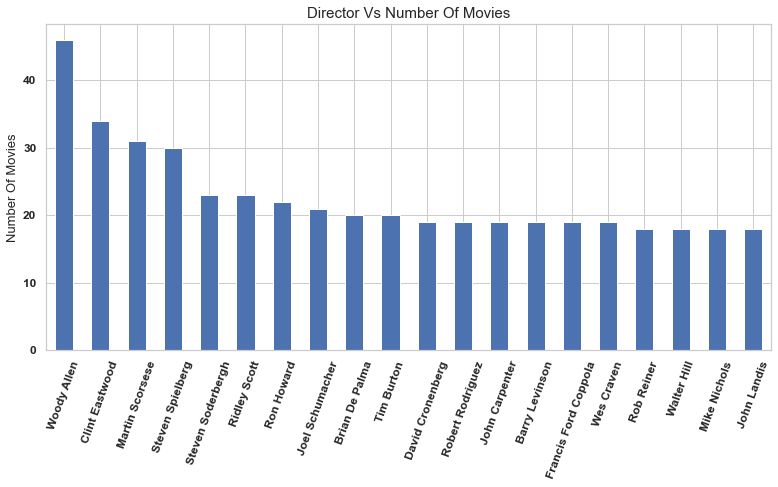

In [64]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies directed by each diretor.
count_director_movies = count_genre('director')

#plot a barh graph
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

**Research Question 19: What kinds of properties are associated with movies that have high revenues?**

In [67]:
info = pd.DataFrame(movies_df['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','cast','director','runtime','genres','vote_average','release_year']
for i in data_set:
    info[i] = movies_df[i]
info.head(3)

,revenue,id,popularity,budget,original_title,cast,director,runtime,genres,vote_average,release_year
1386,2.781506e+09,19995,9.432768,237000000.0,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2.068178e+09,140607,11.173104,200000000.0,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,1.845034e+09,597,4.355219,200000000.0,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,7.3,1997


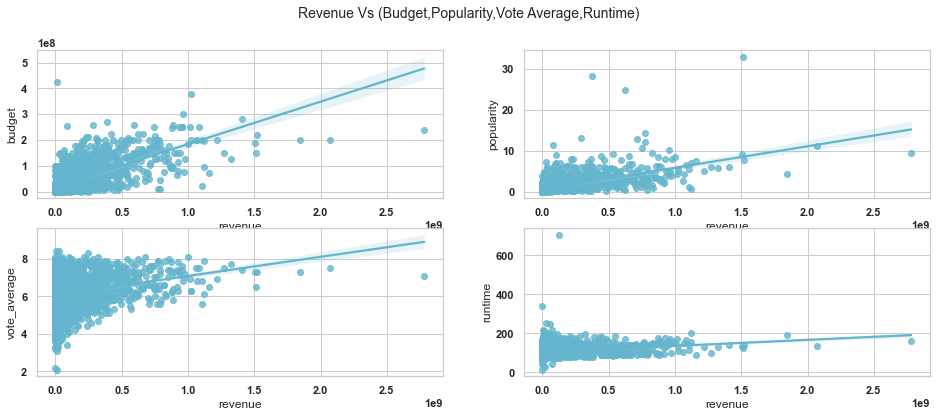

In [68]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
#info.plot(x = ['revenue'],y = ['budget'],kind = "scatter",ax = axes[0][0])
sns.regplot(x=movies_df['revenue'], y=movies_df['budget'],color='c',ax=axes[0][0])
sns.regplot(x=movies_df['revenue'], y=movies_df['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=movies_df['revenue'], y=movies_df['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=movies_df['revenue'], y=movies_df['runtime'],color='c',ax=axes[1][1])
#axes.scatter(info['revenue'],info['vote_average'])
sns.set_style("whitegrid")

In [69]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

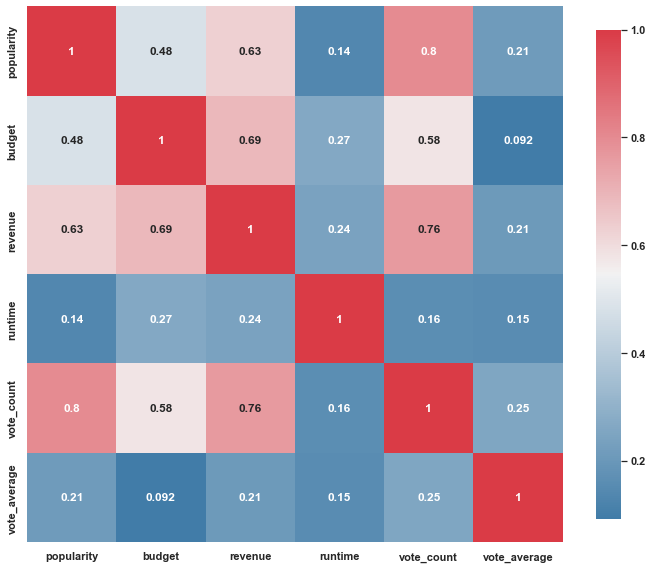

In [70]:
plot_correlation_map(movies_df[['popularity','budget','revenue','runtime','vote_count','vote_average']])

A brief description of the above plots,

**Plot 1: Budget vs Revenue**

The revenues do increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.

Correlation = 0.69
I can't find a relationship here. The revenues don't seem to change with higher vote average.

**Plot 2: Popularity vs Revenue**

The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.

Correlation = 0.63
**Plot 3: Vote Average vs Revenue**

The correlation between revenue and vote average is 0.21. So vote average is not highly related to the revenue.

**Plot 4: Runtime vs Revenue**

The correlation between revenue and runtime is 0.24. So runtime is not highly related to the revenue.

# 4. Conclusions
1. Drama is the most popular genre, following by action, comedy and thriller.
2. Drame, Comedy, Thriller and Action are four most-made genres.
3. Maximum Number Of Movies Release In year 2014.
4. 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
5. Short or Long duration movies are more popular than long duration movies.
6. Average runtime of the movies are decreasing year by year.
7. May,June,November and December are most popular month for releasing movies, if you want to earn more profit.
8. Revenue is directly connected to the budget.
9. Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.
10. Movies with higher budgets have shown a corresponding increase in the revenues.

# Limitations

1. Using this formula does not 100% guarentee that it's going to work when applied. This exploration just shows probability if faced with similar characteristics. An example in this dataset is where movies with higher budgets have shown a corresponding increase in the revenues. This, in real life, is not always the case.
2. During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.